## Display Data Practice

1. Download the display_data document from Moodle
2. Explore the data, what do you conclude?
3. Measure the Correlation between the different variables;
4. Pick two variables and plot them in a scatterplot
5. Create a model to predict the revenue from the different activities of the users.

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

In [2]:
df = pd.read_csv('../Data/display_data.csv')

In [3]:
df.head()

,spend,clicks,impressions,display,transactions,revenue,ctr,con_rate
0,22.61,165,8672,0,2,58.88,1.90,1.21
1,37.28,228,11875,0,2,44.92,1.92,0.88
2,55.57,291,14631,0,3,141.56,1.99,1.03
3,45.42,247,11709,0,2,209.76,2.11,0.81
4,50.22,290,14768,0,3,197.68,1.96,1.03


In [4]:
df.corr()

,spend,clicks,impressions,display,transactions,revenue,ctr,con_rate
spend,1.000000,0.972575,0.881120,-0.044598,0.866124,0.789455,0.030247,-0.309507
clicks,0.972575,1.000000,0.900952,-0.007813,0.899922,0.824275,0.054249,-0.254982
impressions,0.881120,0.900952,1.000000,-0.393187,0.637874,0.614646,-0.346230,-0.521173
display,-0.044598,-0.007813,-0.393187,1.000000,0.371892,0.314111,0.962661,0.834355
transactions,0.866124,0.899922,0.637874,0.371892,1.000000,0.866612,0.420520,0.126200
revenue,0.789455,0.824275,0.614646,0.314111,0.866612,1.000000,0.354134,0.058144
ctr,0.030247,0.054249,-0.346230,0.962661,0.420520,0.354134,1.000000,0.759730
con_rate,-0.309507,-0.254982,-0.521173,0.834355,0.126200,0.058144,0.759730,1.000000


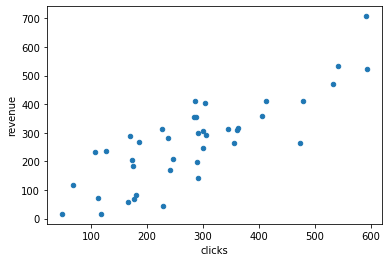

In [5]:
df.plot(x='clicks', y='revenue', kind="scatter")

In [6]:
y = df['revenue']
x = df['clicks']
model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                revenue   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              475.0
Date:                Fri, 16 Oct 2020   Prob (F-statistic):                    1.92e-23
Time:                        21:05:42   Log-Likelihood:                         -234.27
No. Observations:                  40   AIC:                                      470.5
Df Residuals:                      39   BIC:                                      472.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [7]:
y = df['revenue']
x = df[['spend', 'clicks', 'impressions', 'display', 'transactions', 'ctr', 'con_rate']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     16.48
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           5.50e-09
Time:                        21:05:42   Log-Likelihood:                -226.36
No. Observations:                  40   AIC:                             468.7
Df Residuals:                      32   BIC:                             482.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -25.2600    246.989     -0.102   

In [8]:
y = df['revenue']
x = df[['transactions']]
model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                revenue   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              621.7
Date:                Fri, 16 Oct 2020   Prob (F-statistic):                    1.42e-25
Time:                        21:05:42   Log-Likelihood:                         -229.25
No. Observations:                  40   AIC:                                      460.5
Df Residuals:                      39   BIC:                                      462.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------